In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [8]:
np.random.normal(size=10)

array([-1.61336906,  0.4954891 , -0.40075101, -0.91692907,  0.60563115,
       -1.83253099, -1.42666798, -0.81005329, -1.43746986, -0.22304418])

In [10]:
np.histogram(np.random.normal(size=100), bins='auto')

(array([ 1,  4, 12, 20, 21, 19, 15,  6,  2]),
 array([-2.90562693, -2.29159131, -1.67755569, -1.06352008, -0.44948446,
         0.16455115,  0.77858677,  1.39262239,  2.006658  ,  2.62069362]))

In [11]:
def nbins(data, method):
    return len(np.histogram(data, bins=method)[0])

In [12]:
np.logspace(1, 3, num=5).astype(int)

array([  10,   31,  100,  316, 1000])

Generate a list of data set sizes that we want to look at. Because the number of bins will more slowly increase than the number of data points, generate data set sizes using log sapce.

In [13]:
data = {'n': np.logspace(0.5, 5, num=50).astype(int)}

In [14]:
data

{'n': array([     3,      3,      4,      5,      7,      9,     11,     13,
            17,     21,     26,     32,     39,     49,     61,     75,
            93,    115,    142,    175,    217,    268,    331,    409,
           505,    625,    772,    954,   1178,   1456,   1799,   2222,
          2746,   3393,   4192,   5179,   6399,   7906,   9767,  12067,
         14909,  18420,  22758,  28117,  34738,  42919,  53026,  65512,
         80940, 100000])}

In [15]:
methods = ['sturges', 'scott', 'fd']

In [18]:
for method in methods:
    result = np.array([nbins(np.random.normal(size=x), method) for x in data['n']])
    data[method] = result

In [19]:
df = pd.DataFrame(data, columns=['n', 'sturges', 'scott', 'fd'])

In [20]:
df.head()

,n,sturges,scott,fd
0,3,3,2,2
1,3,3,1,2
2,4,3,2,2
3,5,4,2,2
4,7,4,2,7


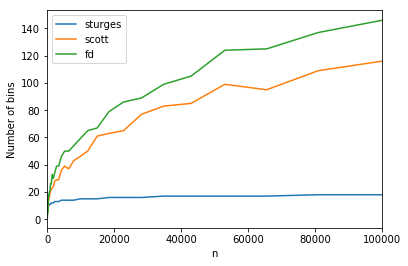

In [22]:
ax = df.plot(x='n')
ax.set_ylabel("Number of bins")

Comments:   
- Sturges: number of bins barely increases; agrees with well known wisdom that it tends to underestimate right number of bins for large data set
- Scott and FD give much larger number of bins, becase they have very similar formula

An example where Sturges will mask some interesting features of a data set by suggesting too few bins.

Generate two large data sets with normal distribution, 10 million samples each with different mean values (0.0, 2.1).

In [25]:
samples = 10000000
dist1 = np.random.normal(loc=0.0, size=samples)
dist2 = np.random.normal(loc=2.1, size=samples)
dist = np.concatenate([dist1, dist2])

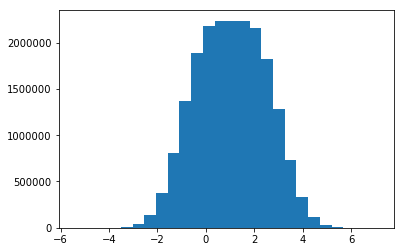

In [27]:
_ = plt.hist(dist, bins='sturges')

The center looks flat, but it still looks normal.

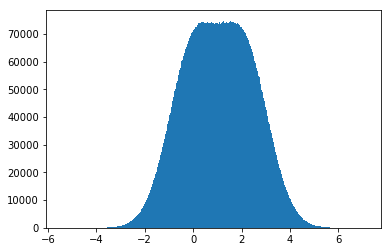

In [30]:
_ = plt.hist(dist, bins='auto')

The resolution is much higher, and the details can be seen more clearly.

Can see two peaks, and maybe this tells us something (in this case, that two distributions were combined). 